#### Assignment 1  - YuTingTseng (E0503474)
This answer sheet contains your answer to questions in Section 1~4. Sentences in <span style="color:blue">blue</span> indicates questions to be answered. 

For open questions, please organize your answer into "points" to ease our grading efforts. For example, an answer to "What is the most popular item? Explain you answer and describe any assumptions you’ve made." should look like:

> The most popular item ID is 12345. The reason is that:
> - reason 1
> - reason 2
> 
> I've made the following assumptions:
> - assumption 1
> - assumption 2

If you wish to type math equations in markdown, follow this link: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

Remember to save this Jupyter notebook as __YourNameInLumiNUS_YourNUSNETID.ipynb__.

**Import all libraries and load data here**

In [1]:
# This is a code cell
# -- Import all libraries and load data in this cell --
import numpy  as np
import pandas as pd
import time
import joblib
import matplotlib.pyplot as plt
from sklearn.cluster   import KMeans
from efficient_apriori import apriori

data1 = joblib.load("assignment1.data")  # numpy.ndarray
data2 = pd.read_csv("record.csv")        # pandas.core.frame.DataFrame

### Section 1 - Clustering and Initialization (20 points)

<span style="color:blue"> Consider the nine data points (A, B, C, D, E, F, G, H, I) in Fig. 1. Taking the points D, E, and F as the initial cluster centers, apply the K-Means algorithm on the data, with the number of clusters K = 3. At the end of each iteration, list the positions of the cluster centers, as well as the set of points belonging to each cluster. Do you think this clustering result is satisfactory? </span>

The initial cluster centroids are the position of $D$, $E$, $F$.<br>
```
iter = 0: Centroids [(0,1), (0,0), (1,0)] Labels of Data [0, 1, 2, 0, 1, 2, 0, 1, 2]
iter = 1: Centroids [(0,1), (0,0), (1,0)] Labels of Data [0, 1, 2, 0, 1, 2, 0, 1, 2]
iter = 2: Centroids [(0,1), (0,0), (1,0)] Labels of Data [0, 1, 2, 0, 1, 2, 0, 1, 2]
iter = 3: Centroids [(0,1), (0,0), (1,0)] Labels of Data [0, 1, 2, 0, 1, 2, 0, 1, 2]
...
# the clustering result remains the same after several iterations (converged)```


I think the clustering result is <strong>not satisfactory</strong>. The reason is that:
1. We request for <em>less intracluster distance</em> and <em>larger intercluster distance</em>. However, the situation above doesn't achieve the goal; $(A, B, C)$, $(D, E, F)$ and $(G, H, I)$ are actually a better clustering result.

<span style="color:blue"> Initialization is important for K-means. Consider the following heuristic method for selecting the initial cluster center positions: <br><br>
Choose the first center $c_1$ as the point A.<br>
For $k=2,...,K$, set $c_k = \underset{x\in X}{\arg\max}(\underset{i=1,...,k-1}{\min}\Vert x - c_i \Vert_2)$, where X is the set of data points.<br><br>
Apply this heuristic to the data points in Fig. 1. Show the computed cluster centers for K = 3. Next, run the K-means algorithm with the obtained cluster centers. At the end of each iteration, list the positions of the cluster centers, as well as the set of points belonging to each cluster.
</span>

$A$ is the first center $c_1$. We would choose the point further from $A$, the point $I$ as $c_2$. The last cluster centroid following the instructions would be $E$.<br>
The initial cluster centroids are the position of $A$, $I$, $D$.<br>
```
iter = 0: Centroids [(-5,1), (5,-1), (0,0)] Labels of Data [0, 0, 0, 1, 1, 1, 2, 2, 2]
iter = 1: Centroids [(-5,0), (5, 0), (0,0)] Labels of Data [0, 0, 0, 1, 1, 1, 2, 2, 2]
iter = 2: Centroids [(-5,0), (5, 0), (0,0)] Labels of Data [0, 0, 0, 1, 1, 1, 2, 2, 2]
iter = 3: Centroids [(-5,0), (5, 0), (0,0)] Labels of Data [0, 0, 0, 1, 1, 1, 2, 2, 2]
...
# the clustering result remains the same after several iterations (converged)```

### Section 2 - Selecting the Number of Clusters (10 points)

<span style="color:blue"> Here, we will explore how to select the number of clusters. Using Python 3.6, load the attached data file 'assignment1.data' using the following commands:</span>
    
<span style="color:blue">import joblib<br>X = joblib.load('assignment1.data')</span>

<span style="color:blue">This results in X, which is a 400 by 2 matrix, where each row is a single sample, in 2 dimensions. Apply K-means on these samples with K ranging from 1 to 10. Plot a figure, where the y-axis is the Within Cluster Sum of Squares (WCSS) after convergence, and the x-axis is K from 1 to 10: </span>

<span style="color:blue">$WCSS = \sum_{k=1}^K \sum_{x \in C_i} \Vert x - c_i \Vert_2^2$</span>

<span style="color:blue">Select a value of K that you think is appropriate for clustering this dataset, and explain the reason. </span>

k =  1, wcss = 22800.675548638064356
k =  2, wcss = 10437.716090329677172
k =  3, wcss = 3937.528039558056662
k =  4, wcss = 517.886091708018171
k =  5, wcss = 463.503867042240643
k =  6, wcss = 415.291068142373376
k =  7, wcss = 372.013486291308482
k =  8, wcss = 323.771281256676843
k =  9, wcss = 298.107795891113085
k = 10, wcss = 268.832731678196069


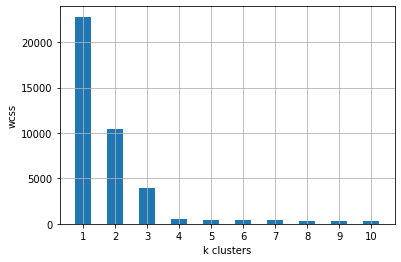

In [2]:
# This is a code cell
# -- Your code for running clustering and plotting the figure goes here.

x, y = [], []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 7122).fit(data1)
    labels = kmeans.labels_
    center = kmeans.cluster_centers_

    wcss = 0
    for i in range(400):
        wcss += np.sum((data1[i] - center[labels[i]]) ** 2)
    print ("k = {:2d}, wcss = {:.15f}".format(k, wcss))
    x.append(k)
    y.append(wcss)

plt.bar(x, y, .5)
plt.xlabel("k clusters")
plt.ylabel("wcss")
plt.xticks(x)
plt.grid(True)
plt.show()

I think <strong>$K = 4$</strong>  would be the best choice, the following statements are my reasons.<br>
1. If the cluster number is $1$, $wcss$ is about $74.54$, which is actually a large number, indicating that the intracluster distance is extremely large.
2. With the number of clusters increases, $wcss$ seems to decrease, showing that the distance within the cluster is deducing.
3. As it goes to $4$, $wcss$ drops dramtically comparing with the previous value and tend to converge. We can get the results good enough (within $K = 1 - 10$) and simultaneously reduce the computing resource consumption.

### Section 3 - Data Cleaning and Exploration (20 points)

<span style="color:blue"> 1) Before continuing, let us examine the dataset for “dirty” records to do some data cleaning. Remove the records with negative values of the Quantity variable, and the records with NaN values of the CustomerID variable. Report how many records were removed in total. </span>

I first add a column with index. Next, I find the list of the index of invalid records, including those with negative quantity and with NaN customerID. The total number of items in the delete list is 143985.

In [3]:
# This is a code cell
# -- Your code for removing dirty records goes here --
data2["Index"] = list(range(len(data2.index)))
deleteQ = set(data2["Index"][data2["Quantity"] < 0])
deleteC = set(data2["Index"][data2["CustomerID"].isnull()])
delete  = list(set.union(deleteQ, deleteC))
delete.sort()
print ("Delete {} records".format(len(delete)))
data2 = data2.drop(delete,  axis = 0)
data2 = data2.drop("Index", axis = 1)

Delete 143985 records


<span style="color:blue"> 2)~9) Please provide the answers to the questions listed in the table. </span>

In [4]:
# This is a code cell
# -- (Optional) Your code for filling in the table goes here. --
print ("Starting date of the dataset? {}".format(min(data2["InvoiceDate"])))
print ("Ending   date of the dataset? {}".format(max(data2["InvoiceDate"])))
print ("\n")
print ("Number of Customers?    {:5d}".format(len(data2.groupby("CustomerID"))))
print ("Number of Transactions? {:5d}".format(len(data2.groupby("InvoiceNo" ))))
print ("Number of Different Kind of Items? {:5d}".format(len(data2.groupby("StockCode"))))
print ("\n")
print ("Number of transactions customer ID 17850 has made?  {:5d}" .format(data2.groupby("CustomerID")["InvoiceNo"].nunique().at[17850.0]))
print ("Which customer (ID) has made the most transactions? {:.0f}".format(data2.groupby("CustomerID")["InvoiceNo"].nunique().idxmax()))
print ("What is the item ID (i.e. StockCode) of the best-seller? {}".format(data2.groupby("StockCode")["Quantity"].sum().idxmax()))

Starting date of the dataset? 2010-12-01 08:26:00
Ending   date of the dataset? 2011-12-09 12:50:00


Number of Customers?     4339
Number of Transactions? 18536
Number of Different Kind of Items?  3665


Number of transactions customer ID 17850 has made?     34
Which customer (ID) has made the most transactions? 12748
What is the item ID (i.e. StockCode) of the best-seller? 23843


This is a markdown cell. Please fill in your answer for (2)~(9).

| No. | Question                                                                                                   | Answer       |
|-----|------------------------------------------------------------------------------------------------------------|--------------|
| 2)  | Starting date of the dataset?                                                                              | 2010-12-01 |
| 3)  | Ending date of the dataset?                                                                                | 2011-12-09 |
| 4)  | Number of customers?                                                                                       | 4339 |
| 5)  | Number of transactions?                                                                                    | 18536 |
| 6)  | Number of different kind of items?                                                                         | 3665 |
| 7)  | Number of transactions customer ID 17850 has made?                                                         | 34 |
| 8)  | Which customer (ID) has made the most transactions?                                                        | 12748 |
| 9)  | What is the item ID (i.e. StockCode) of the best-seller? We define "best-seller" as the item with the highest sales volume. | 23843 |

<span style="color:blue"> 10) Next, let us get some general understanding about the transactions. Please make a histogram of the number of unique items per transaction (as described below) and describe one insight that you can observe from the plot.  
(Note: You can plot this histogram by running matplotlib.hist() with 200 bins on the sequence of values $n_1, …, n_N$, where $n_i$ is the number of unique items in transaction $i$. This produces a histogram with “number of unique items in transaction” in the x-axis, and “count” in the y-axis, i.e. each bar counts how many transactions fall into the corresponding bucket. It is sufficient to comment on the general shape of the curve and what it implies about the data; it’s fine if the insight does not seem especially interesting.)
</span>

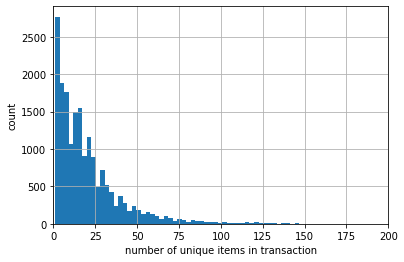

In [5]:
# This is a code cell
# --- Your code for generating the histogram goes here ---
tmp = data2.groupby("InvoiceNo")["StockCode"].nunique().values

plt.hist(tmp, bins = 200)
plt.xlabel("number of unique items in transaction")
plt.ylabel("count")
plt.xlim(0, 200)
plt.grid(True)
plt.show()
plt.show()

The distribution is similar to exponential distribution. It showed that most of the people tend to buy a little number of unique items once.
1. The count decreases dramatically when the number of unique items in transaction increases at first.
2. The count turns to small decline subsequently even though the number of unique items in transaction is still inclining.
3. Perhaps most people do not need so many different things in their daily lifes (only need to buy what they lack).

#### Section 4 - Mining Association Rules

<span style="color:blue"> 1) Will we complete the counting before the sun burns out (the sun has another $ 5 \times 10^9 < 2^{33} $ years to burn)? </span>

<em>No</em>. The reason is as below:
1. The total number of all possible itemsets would be approximate $3^n$, where $n$ is the number of the item. In this case, $n=3665$.
2. We need about $\frac{3^{3665}*2}{2^{36}}>2^{3630}$ seconds to consider compute the support and confidence for each rule.
3. It is obviously that the needed time is much larger than $2^{33}*60*60*24*265$.

In [6]:
# This is a code cell
# --- Your code for preprocessing transactions goes here ---
transactions = data2.groupby("InvoiceNo")["StockCode"].apply(list)

<span style="color:blue"> 2) Run efficient-apriori in python with min_support=0.025, min_confidence=0.2, max_length=4. Write down the number of rules found and the rule with the highest lift. </span>

In [7]:
# This is a code cell
# --- Your code for apriori algorithm goes here ---
beg = time.time()
itemsets, rules = apriori(list(transactions.values), min_support = 0.025, min_confidence = 0.2, max_length = 4)
end = time.time()

print ("Time Usage: {:.6f}".format(end - beg))
print (len(rules))
for rule in sorted(rules, key = lambda rule: rule.lift):
    print (rule)

Time Usage: 17.577211
22
{85099B} -> {23203} (conf: 0.292, supp: 0.025, lift: 5.020, conv: 1.331)
{23203} -> {85099B} (conf: 0.433, supp: 0.025, lift: 5.020, conv: 1.612)
{22382} -> {20725} (conf: 0.473, supp: 0.025, lift: 6.797, conv: 1.764)
{20725} -> {22382} (conf: 0.362, supp: 0.025, lift: 6.797, conv: 1.485)
{20727} -> {20725} (conf: 0.491, supp: 0.028, lift: 7.067, conv: 1.830)
{20725} -> {20727} (conf: 0.401, supp: 0.028, lift: 7.067, conv: 1.575)
{22383} -> {20725} (conf: 0.498, supp: 0.028, lift: 7.156, conv: 1.852)
{20725} -> {22383} (conf: 0.403, supp: 0.028, lift: 7.156, conv: 1.580)
{85099B} -> {22386} (conf: 0.341, supp: 0.029, lift: 7.262, conv: 1.447)
{22386} -> {85099B} (conf: 0.627, supp: 0.029, lift: 7.262, conv: 2.449)
{22383} -> {20727} (conf: 0.446, supp: 0.025, lift: 7.855, conv: 1.702)
{20727} -> {22383} (conf: 0.442, supp: 0.025, lift: 7.855, conv: 1.691)
{22384} -> {20725} (conf: 0.562, supp: 0.028, lift: 8.078, conv: 2.123)
{20725} -> {22384} (conf: 0.406, su

The number of rules: 22<br>
The rule with the highest lift:
* {22699} -> {22697} (conf: 0.691, supp: 0.029, lift: 18.534, conv: 3.115)
* {22697} -> {22699} (conf: 0.783, supp: 0.029, lift: 18.534, conv: 4.412)

<span style="color:blue"> 3) Run efficient-apriori in python with min_support=0.02, min_confidence=0.2, max_length=4. Write down the number of rules found and the rule with the highest lift. </span>

In [8]:
# This is a code cell
# --- Your code for apriori algorithm goes here ---
beg = time.time()
itemsets, rules = apriori(list(transactions.values), min_support = 0.020, min_confidence = 0.2, max_length = 4)
end = time.time()

print ("Time Usage: {:.6f}".format(end - beg))
print (len(rules))
for rule in sorted(rules, key = lambda rule: rule.lift):
    print (rule)

Time Usage: 46.565479
88
{85099B} -> {20725} (conf: 0.266, supp: 0.023, lift: 3.820, conv: 1.267)
{20725} -> {85099B} (conf: 0.330, supp: 0.023, lift: 3.820, conv: 1.363)
{85099B} -> {23203} (conf: 0.292, supp: 0.025, lift: 5.020, conv: 1.331)
{23203} -> {85099B} (conf: 0.433, supp: 0.025, lift: 5.020, conv: 1.612)
{47566} -> {23298} (conf: 0.282, supp: 0.021, lift: 5.178, conv: 1.317)
{23298} -> {47566} (conf: 0.386, supp: 0.021, lift: 5.178, conv: 1.506)
{85099B} -> {22411} (conf: 0.247, supp: 0.021, lift: 5.807, conv: 1.272)
{22411} -> {85099B} (conf: 0.501, supp: 0.021, lift: 5.807, conv: 1.832)
{22699} -> {22423} (conf: 0.536, supp: 0.023, lift: 5.835, conv: 1.959)
{22423} -> {22699} (conf: 0.246, supp: 0.023, lift: 5.835, conv: 1.271)
{22697} -> {22423} (conf: 0.541, supp: 0.020, lift: 5.888, conv: 1.979)
{22423} -> {22697} (conf: 0.219, supp: 0.020, lift: 5.888, conv: 1.233)
{23209} -> {20725} (conf: 0.417, supp: 0.023, lift: 5.989, conv: 1.595)
{20725} -> {23209} (conf: 0.325, 

The number of rules: 88<br>
The rule with the highest lift:
* {22697, 22699} -> {22698} (conf: 0.721, supp: 0.021, lift: 24.033, conv: 3.475)
* {22698} -> {22697, 22699} (conf: 0.701, supp: 0.021, lift: 24.033, conv: 3.252)

<span style="color:blue"> 4) Run efficient-apriori in python with min_support=0.025, min_confidence=0.4, max_length=4. Write down the number of rules found and the rule with the highest lift. </span>

In [9]:
# This is a code cell
# --- Your code for apriori algorithm goes here ---
beg = time.time()
itemsets, rules = apriori(list(transactions.values), min_support = 0.025, min_confidence = 0.4, max_length = 4)
end = time.time()

print ("Time Usage: {:.6f}".format(end - beg))
print (len(rules))
for rule in sorted(rules, key = lambda rule: rule.lift):
    print (rule)

Time Usage: 18.066964
19
{23203} -> {85099B} (conf: 0.433, supp: 0.025, lift: 5.020, conv: 1.612)
{22382} -> {20725} (conf: 0.473, supp: 0.025, lift: 6.797, conv: 1.764)
{20727} -> {20725} (conf: 0.491, supp: 0.028, lift: 7.067, conv: 1.830)
{20725} -> {20727} (conf: 0.401, supp: 0.028, lift: 7.067, conv: 1.575)
{22383} -> {20725} (conf: 0.498, supp: 0.028, lift: 7.156, conv: 1.852)
{20725} -> {22383} (conf: 0.403, supp: 0.028, lift: 7.156, conv: 1.580)
{22386} -> {85099B} (conf: 0.627, supp: 0.029, lift: 7.262, conv: 2.449)
{22383} -> {20727} (conf: 0.446, supp: 0.025, lift: 7.855, conv: 1.702)
{20727} -> {22383} (conf: 0.442, supp: 0.025, lift: 7.855, conv: 1.691)
{22384} -> {20725} (conf: 0.562, supp: 0.028, lift: 8.078, conv: 2.123)
{20725} -> {22384} (conf: 0.406, supp: 0.028, lift: 8.078, conv: 1.598)
{22384} -> {20727} (conf: 0.498, supp: 0.025, lift: 8.781, conv: 1.880)
{20727} -> {22384} (conf: 0.441, supp: 0.025, lift: 8.781, conv: 1.699)
{82494L} -> {82482} (conf: 0.577, sup

The number of rules: 19<br>
The rule with the highest lift:
* {22699} -> {22697} (conf: 0.691, supp: 0.029, lift: 18.534, conv: 3.115)
* {22697} -> {22699} (conf: 0.783, supp: 0.029, lift: 18.534, conv: 4.412)

<span style="color:blue"> 5) Compare the first two cases. How do they differ in the time taken for the algorithm to run, the number of rules found, and the lift of the highest lift rule? Briefly explain why each of these findings occur, based on the effects of changing min_support.  </span>

The second case with the smaller ```min_support``` has more rules found. It took about 40 seconds, while the first case spent only 18 seconds. The reason is shown below:
1. The support refers to the popularity of an itemset (the number of transactions with both itemsets / total number of transactions); which indicates that the supports of rules are fixed by the data we got.
2. If we set the threshold higher, the number of the rules that are satisfied would decrease.
3. It is intuitive that the more rules we consider, the more time we need to compute the results.

In addition, the highest lift of the first case is about 18 wheras that of the second case is about 24. This is because that:
1. lift = confidence / support
2. We consider the itemsets with lower support, lead to the formula with smaller denominator.
3. We got the maximum lift with larger result.

<span style="color:blue"> 6) Compare the first and third case. How do they differ in the number of rules found? Briefly explain why this finding occurs, based on the effects of changing min_confidence. </span>

There are more rules in the first case. The only difference condition is ```min_confidence```. The main reason is stated:
1. The confidences refers to the likelihood that an itemset is also bought if the other is bought (the number of transactions with both itemsets / total number of transactions containing specific itemset); which points that the confidences between each itemsets are fixed.
2. If we set the threshold higher, the number of the rules that are satisfied would decrease.

<span style="color:blue"> 7) Report the descriptions of the items associated with the highest lift rule you found in the three queries (you may use any method to do this). Does the rule make sense? </span>

In [10]:
tmp = data2[["StockCode", "Description"]].drop_duplicates()
tmp.set_index("StockCode", inplace=True)
print (tmp.at["22699", "Description"])
print (tmp.at["22697", "Description"])
print (tmp.at["22698", "Description"])

ROSES REGENCY TEACUP AND SAUCER 
GREEN REGENCY TEACUP AND SAUCER
PINK REGENCY TEACUP AND SAUCER


Scenario 1:
* {22699} -> {22697} (conf: 0.691, supp: 0.029, lift: 18.534, conv: 3.115)
* {22697} -> {22699} (conf: 0.783, supp: 0.029, lift: 18.534, conv: 4.412)

Scenario 2:
* {22697, 22699} -> {22698} (conf: 0.721, supp: 0.021, lift: 24.033, conv: 3.475)
* {22698} -> {22697, 22699} (conf: 0.701, supp: 0.021, lift: 24.033, conv: 3.252)

Scenario 3:
* {22699} -> {22697} (conf: 0.691, supp: 0.029, lift: 18.534, conv: 3.115)
* {22697} -> {22699} (conf: 0.783, supp: 0.029, lift: 18.534, conv: 4.412)

Descriptions:
* 22697: ```GREEN REGENCY TEACUP AND SAUCER```
* 22698: ```PINK  REGENCY TEACUP AND SAUCER```
* 22699: ```ROSES REGENCY TEACUP AND SAUCER```

I think it make sense cause:
1. "Regency teacup and saucer" is a special category compared to other, such as clothes.
2. People who like regency teacup and saucer usually like to collect them, and perhaps treat them in pairs as decoration.
3. They might need various styles for different occasion or to match the personalities.